<a href="https://colab.research.google.com/github/Yash-2842/The-Spark-Foundation-Internship/blob/master/Task_4_Exploratory_Data_Analysis_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GRIP NOV 2022

## AUTHOR: PRAJAPATI YASH HASMUKHBHAI

## TASK-4: Perform Exploratory Data Analysis on dataset 'Global Terrorism'

In [ ]:
#step:1 importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np

In [ ]:
#step:2 importing data
data=pd.read_csv(r"/content/drive/MyDrive/Spark Foundation Internship/globalterrorismdb_0718dist.csv", encoding="latin1")
df=pd.DataFrame(data)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#step:3 seeing data
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
#step:4
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city","attacktype1_txt","targtype1_txt","gname","weaptype1_txt","nkill","nwound"]]

In [ ]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [ ]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country","region_txt":"Region","provstate":"Province/State","city":"City","attacktype1_txt":"AttackType","targtype1_txt":"TargetType","gname":"Group","weaptype1_txt":"WeaponType","nkill":"Killed","nwound":"Wounded"},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df.head()

,Year,Month,Day,Country,Region,Province/State,City,AttackType,TargetType,Group,WeaponType,Killed,Wounded
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [ ]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
Province/State      421
City                434
AttackType            0
TargetType            0
Group                 0
WeaponType            0
Killed            10313
Wounded           16311
dtype: int64

In [ ]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

In [ ]:
df.head()

,Year,Month,Day,Country,Region,Province/State,City,AttackType,TargetType,Group,WeaponType,Killed,Wounded,Casualty
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0,1.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0,1.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,0.0,0.0,0.0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,0.0,0.0,0.0


In [ ]:
df.describe()

,Year,Month,Day,Killed,Wounded,Casualty
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000,9574.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            181691 non-null  int64  
 1   Month           181691 non-null  int64  
 2   Day             181691 non-null  int64  
 3   Country         181691 non-null  object 
 4   Region          181691 non-null  object 
 5   Province/State  181270 non-null  object 
 6   City            181257 non-null  object 
 7   AttackType      181691 non-null  object 
 8   TargetType      181691 non-null  object 
 9   Group           181691 non-null  object 
 10  WeaponType      181691 non-null  object 
 11  Killed          181691 non-null  float64
 12  Wounded         181691 non-null  float64
 13  Casualty        181691 non-null  float64
dtypes: float64(3), int64(3), object(8)
memory usage: 19.4+ MB


# Visualizing Data

## Year wise

In [ ]:
attack=df["Year"].value_counts()
attack

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: Year, dtype: int64

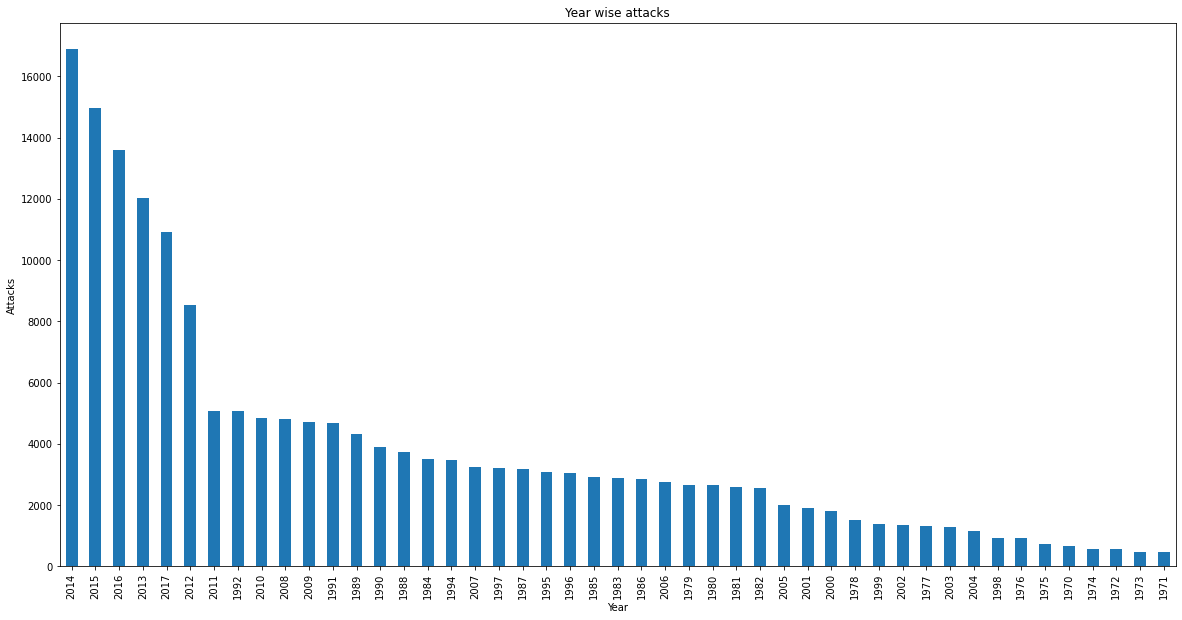

In [ ]:
plt.figure(figsize=(20,10))
attack.plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Attacks")
plt.title("Year wise attacks")
plt.show()

### from above year 2014 have highest number of attacks.

Text(0.5, 1.0, 'Year wise killed')

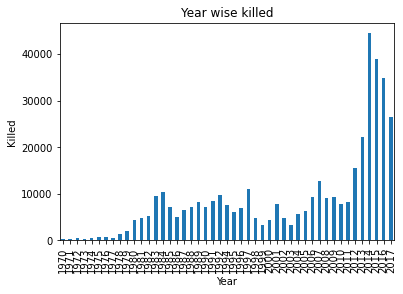

In [ ]:
df.groupby("Year")["Killed"].sum().plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Killed")
plt.title("Year wise killed")

### from above year 2014 have highest number of killed.

Text(0.5, 1.0, 'Year wise wounded')

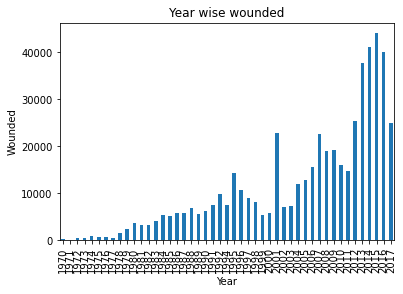

In [ ]:
df.groupby("Year")["Wounded"].sum().plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Wounded")
plt.title("Year wise wounded")

### from above year 2015 have highest number of wounded.

Text(0.5, 1.0, 'Year wise casualty')

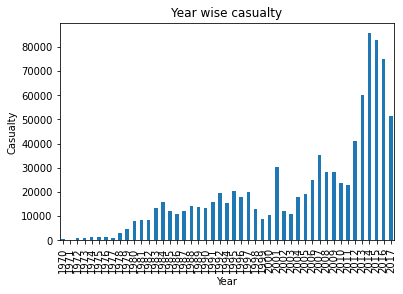

In [ ]:
df.groupby("Year")["Casualty"].sum().plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Casualty")
plt.title("Year wise casualty")

### from above year 2014 have highest number of casualty.

## Region wise

In [ ]:
rattack=df["Region"].value_counts()
rattack

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

Text(0.5, 1.0, 'Region wise attacks')

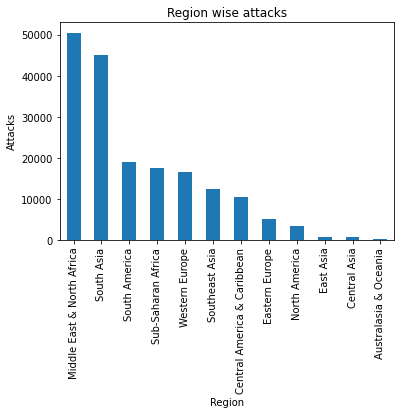

In [ ]:
rattack.plot(kind="bar")
plt.xlabel("Region")
plt.ylabel("Attacks")
plt.title("Region wise attacks")

### from above Middle East & North Africa have highest number of attacks. 

Text(0.5, 1.0, 'Region wise killed')

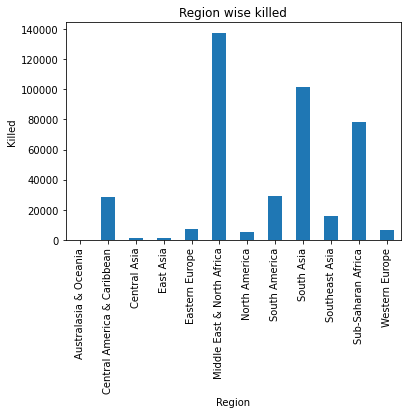

In [ ]:
df.groupby("Region")["Killed"].sum().plot(kind="bar")
plt.xlabel("Region")
plt.ylabel("Killed")
plt.title("Region wise killed")

### from above Middle East & North Africa have highest number of killed.

Text(0.5, 1.0, 'Region wise Wounded')

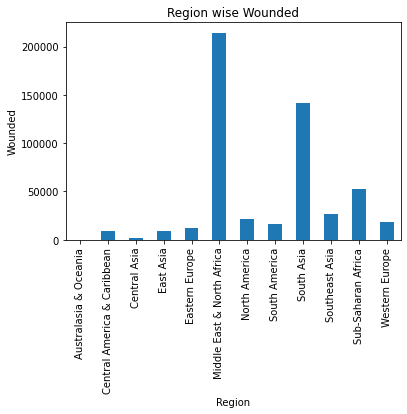

In [ ]:
df.groupby("Region")["Wounded"].sum().plot(kind="bar")
plt.xlabel("Region")
plt.ylabel("Wounded")
plt.title("Region wise Wounded")

### from above Middle East & North Africa have highest number of wounded.

Text(0.5, 1.0, 'Region wise Casualty')

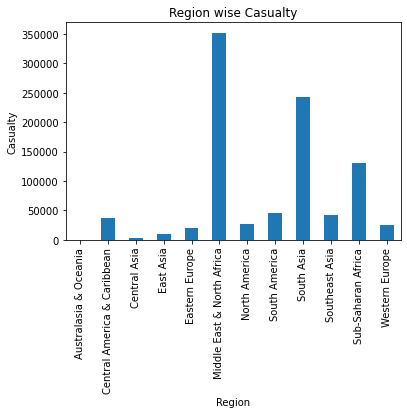

In [ ]:
df.groupby("Region")["Casualty"].sum().plot(kind="bar")
plt.xlabel("Region")
plt.ylabel("Casualty")
plt.title("Region wise Casualty")

### from above Middle East & North Africa have highest number of casualty.

##  Country wise

In [ ]:
cattack=df["Country"].value_counts()[:10]
cattack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

Text(0.5, 1.0, 'Country wise attacks')

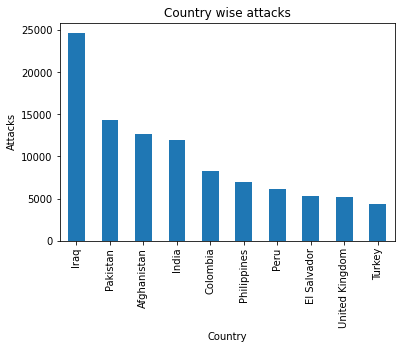

In [ ]:
cattack.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Attacks")
plt.title("Country wise attacks")

### from above iraq have highest number of attacks.

Text(0.5, 1.0, 'Country wise killed')

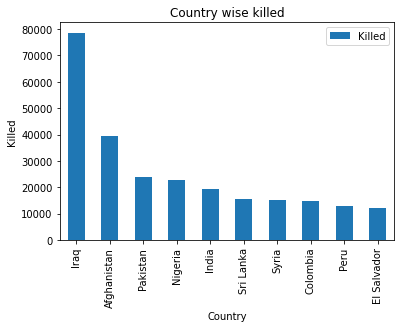

In [ ]:
ca=df.groupby("Country")["Killed"].sum().to_frame()
ca.sort_values(by=['Killed'],ascending=False,inplace=True)
ca[:10].plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Killed")
plt.title("Country wise killed")

### from above Iraq hav highest number of killed.

Text(0.5, 1.0, 'Country wise Wounded')

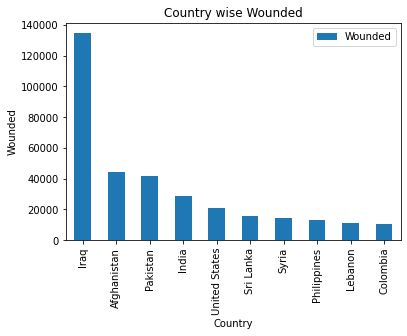

In [ ]:
ca=df.groupby("Country")["Wounded"].sum().to_frame()
ca.sort_values(by=['Wounded'],ascending=False,inplace=True)
ca[:10].plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Wounded")
plt.title("Country wise Wounded")

### from above Iraq have highest number of wounded.

Text(0.5, 1.0, 'Country wise Casualty')

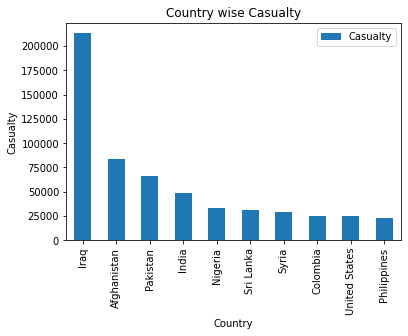

In [ ]:
ca=df.groupby("Country")["Casualty"].sum().to_frame()
ca.sort_values(by=['Casualty'],ascending=False,inplace=True)
ca[:10].plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Casualty")
plt.title("Country wise Casualty")

### from above Iraq have highest number of casualty.

## City wise

In [ ]:
ciattack=df["City"].value_counts()[1:11]
ciattack

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: City, dtype: int64

Text(0.5, 1.0, 'City wise attacks')

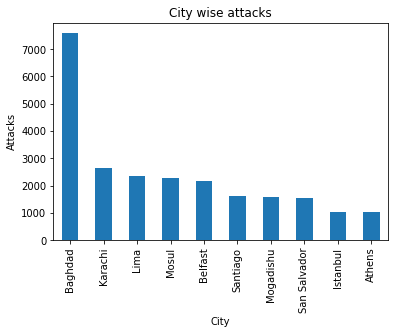

In [ ]:
ciattack.plot(kind="bar")
plt.xlabel("City")
plt.ylabel("Attacks")
plt.title("City wise attacks")

### from above baghdad city have highest number of attacks.

Text(0.5, 1.0, 'City wise killed')

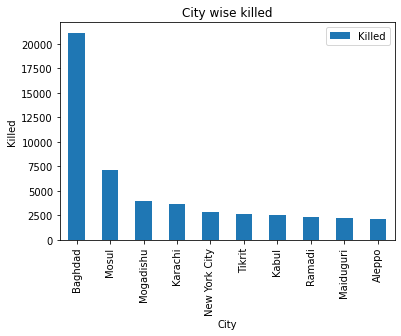

In [ ]:
ci=df.groupby("City")["Killed"].sum().to_frame().drop("Unknown")
ci.sort_values(by=['Killed'],ascending=False,inplace=True)
ci[:10].plot(kind="bar")
plt.xlabel("City")
plt.ylabel("Killed")
plt.title("City wise killed")

### from above baghdad city have highest number of killed.

Text(0.5, 1.0, 'City wise wounded')

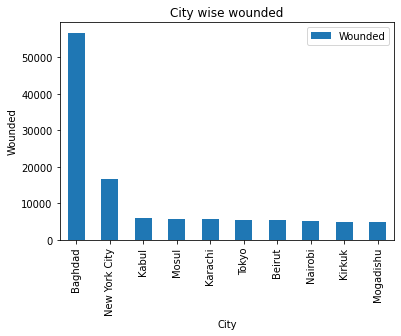

In [ ]:
ci=df.groupby("City")["Wounded"].sum().to_frame().drop("Unknown")
ci.sort_values(by=['Wounded'],ascending=False,inplace=True)
ci[:10].plot(kind="bar")
plt.xlabel("City")
plt.ylabel("Wounded")
plt.title("City wise wounded")

### from above baghdad city have highest number of wounded.

Text(0.5, 1.0, 'City wise casualty')

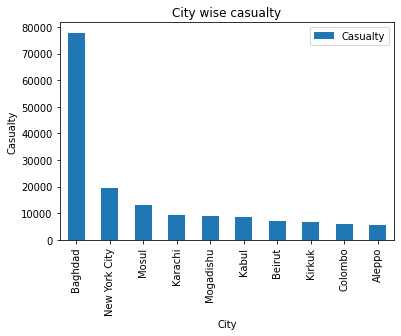

In [ ]:
ci=df.groupby("City")["Casualty"].sum().to_frame().drop("Unknown")
ci.sort_values(by=['Casualty'],ascending=False,inplace=True)
ci[:10].plot(kind="bar")
plt.xlabel("City")
plt.ylabel("Casualty")
plt.title("City wise casualty")

### from above baghdad city have highest number of casualty.

## Group wise

In [ ]:
gattack=df["Group"].value_counts()[1:11]
gattack

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group, dtype: int64

Text(0.5, 1.0, 'Group wise attacks')

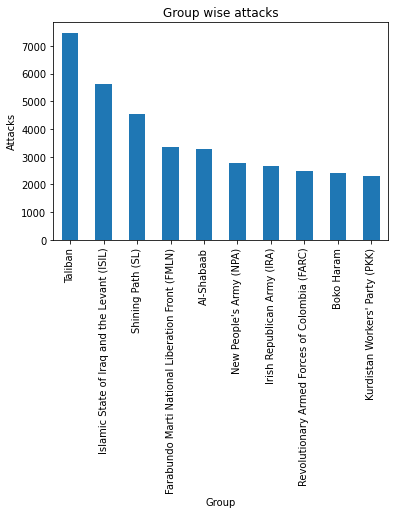

In [ ]:
gattack.plot(kind="bar")
plt.xlabel("Group")
plt.ylabel("Attacks")
plt.title("Group wise attacks")

### from above Taliban have highest number of attacks.

Text(0.5, 1.0, 'Group wise killed')

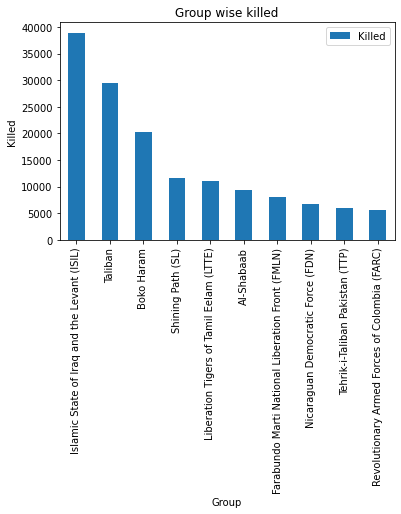

In [ ]:
gattack=df.groupby("Group")["Killed"].sum().to_frame().drop("Unknown")
gattack.sort_values(by=['Killed'],ascending=False,inplace=True)
gattack[:10].plot(kind="bar")
plt.xlabel("Group")
plt.ylabel("Killed")
plt.title("Group wise killed")

### from above ISIL group have highest number of killed.

Text(0.5, 1.0, 'Group wise wounded')

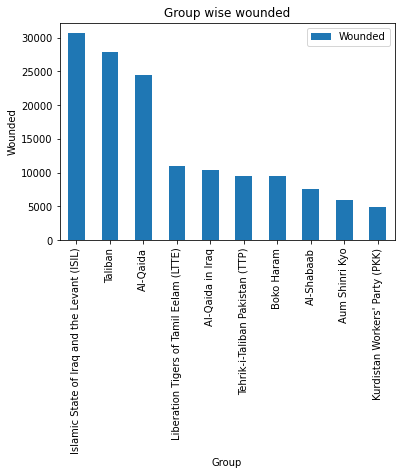

In [ ]:
gattack=df.groupby("Group")["Wounded"].sum().to_frame().drop("Unknown")
gattack.sort_values(by=['Wounded'],ascending=False,inplace=True)
gattack[:10].plot(kind="bar")
plt.xlabel("Group")
plt.ylabel("Wounded")
plt.title("Group wise wounded")

### from above ISIL group have highest number of wounded.

Text(0.5, 1.0, 'Group wise Casualty')

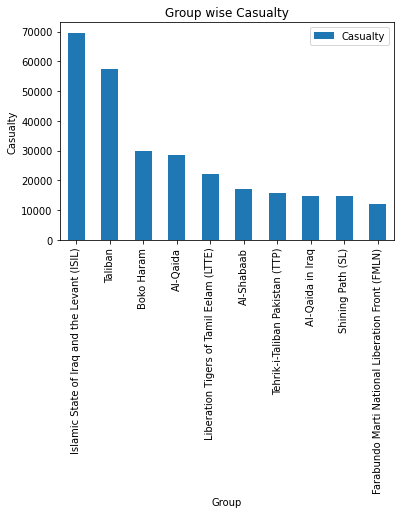

In [ ]:
gattack=df.groupby("Group")["Casualty"].sum().to_frame().drop("Unknown")
gattack.sort_values(by=['Casualty'],ascending=False,inplace=True)
gattack[:10].plot(kind="bar")
plt.xlabel("Group")
plt.ylabel("Casualty")
plt.title("Group wise Casualty")

### from above ISIL group have highest number of casualty.

## Attack wise

In [ ]:
tattack=df["AttackType"].value_counts()
tattack

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

Text(0.5, 1.0, 'Attack Type wise attacks')

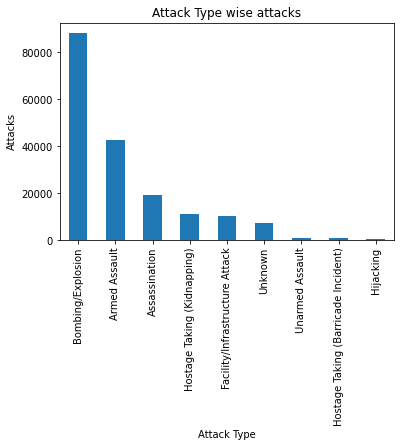

In [ ]:
tattack.plot(kind="bar")
plt.xlabel("Attack Type")
plt.ylabel("Attacks")
plt.title("Attack Type wise attacks")

### from above Bombing/Explosion have highest number of attacks.

Text(0.5, 1.0, 'Attack Type wise killed')

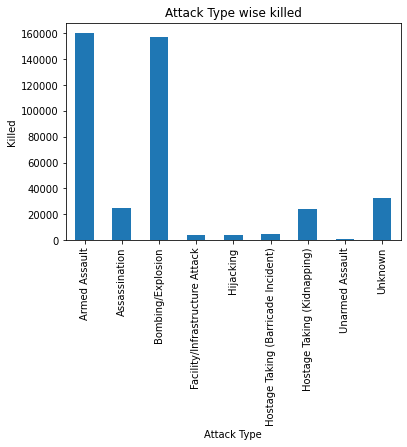

In [ ]:
df.groupby("AttackType")["Killed"].sum().plot(kind="bar")
plt.xlabel("Attack Type")
plt.ylabel("Killed")
plt.title("Attack Type wise killed")

### from above Armed Assault and Bombing/Explosion have highest number of killed.

Text(0.5, 1.0, 'Attack Type wise wounded')

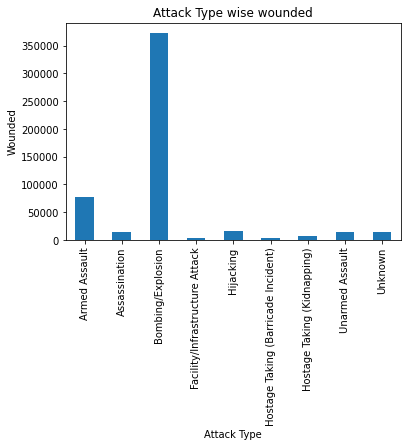

In [ ]:
df.groupby("AttackType")["Wounded"].sum().plot(kind="bar")
plt.xlabel("Attack Type")
plt.ylabel("Wounded")
plt.title("Attack Type wise wounded")

### from above Bombing/Explosion have highest number of wounded.

Text(0.5, 1.0, 'Attack Type wise casualty')

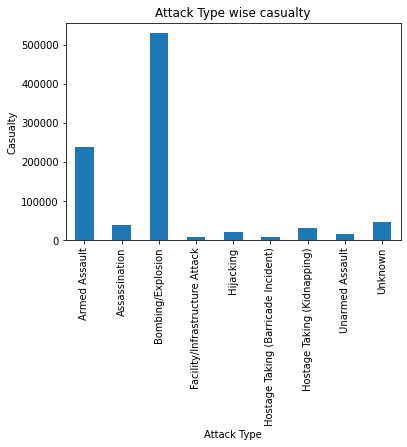

In [ ]:
df.groupby("AttackType")["Casualty"].sum().plot(kind="bar")
plt.xlabel("Attack Type")
plt.ylabel("Casualty")
plt.title("Attack Type wise casualty")

### from above Bombing/Explosion have highest number of casualty.

## Target Type wise

In [ ]:
ttattack=df["TargetType"].value_counts()
ttattack

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: TargetType, dtype: int64

Text(0.5, 1.0, 'Target Type wise attacks')

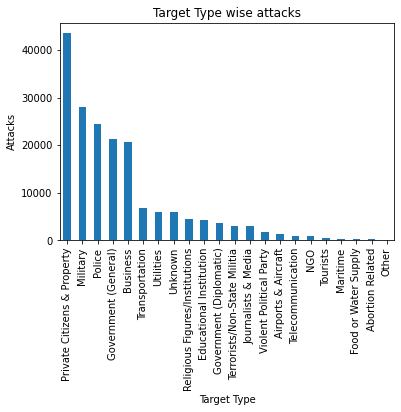

In [ ]:
ttattack.plot(kind="bar")
plt.xlabel("Target Type")
plt.ylabel("Attacks")
plt.title("Target Type wise attacks")

## from above Private Citizens & Property have highest number of attacks.

Text(0.5, 1.0, 'Target Type wise killed')

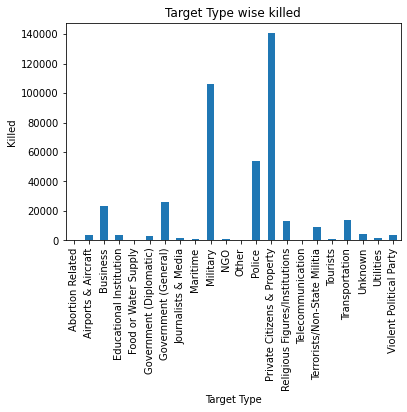

In [ ]:
df.groupby("TargetType")["Killed"].sum().plot(kind="bar")
plt.xlabel("Target Type")
plt.ylabel("Killed")
plt.title("Target Type wise killed")

### from above Private Citizens & Property have highest number of killed.

Text(0.5, 1.0, 'Target Type wise wounded')

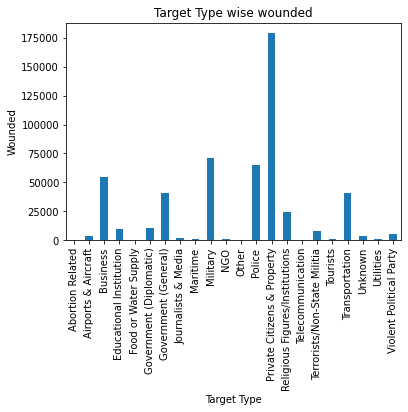

In [ ]:
df.groupby("TargetType")["Wounded"].sum().plot(kind="bar")
plt.xlabel("Target Type")
plt.ylabel("Wounded")
plt.title("Target Type wise wounded")

### from above Private Citizens & Property have highest number of wounded.

Text(0.5, 1.0, 'Target Type wise casualty')

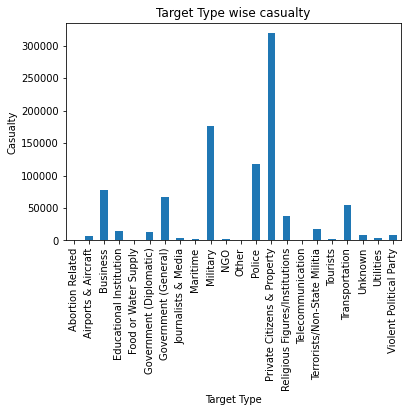

In [ ]:
df.groupby("TargetType")["Casualty"].sum().plot(kind="bar")
plt.xlabel("Target Type")
plt.ylabel("Casualty")
plt.title("Target Type wise casualty")

### from above Private Citizens & Property have highest number of casualty.

## Humanity affected world wide by terrorist attacks from 1970-2017

In [ ]:
df["Killed"].sum()

411868.0

In [ ]:
df["Wounded"].sum()


523869.0

In [ ]:
df["Casualty"].sum()

935737.0

# Conclusion/Observations